In [27]:
from models import engine
from utils import utils
import torch
from torch.utils.data import DataLoader
from torch.optim import Adam
from importlib import reload

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [28]:
vae = engine.VAE(input_shape=(3,128,128), 
              channels_enc=[8, 32, 64],
              channels_dec=[32, 8, 3],
              kernel_enc=[3, 3, 3, 3],
              kernel_dec=[3, 3, 3, 3],
              latent_dim=512,
              target_shape=(128,128))

In [4]:
training_data, test_data = utils.load_CelebA("train"), utils.load_CelebA("test")

In [14]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

In [ ]:
criterion = utils.criterion(beta=1e-2)
optimizer = Adam(vae.parameters(), lr=5e-4)

engine.train_vae(vae, train_dataloader, nb_epochs=2, criterion=utils.criterion(1e-2), optimizer=optimizer, device=device)

In [38]:
X,_,_ = vae(training_data[0][0].unsqueeze(0).to(device))

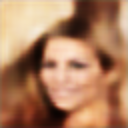

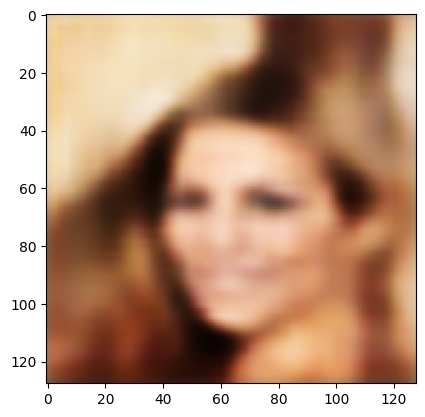

In [40]:
utils.plot_image(X.squeeze(0))

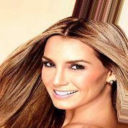

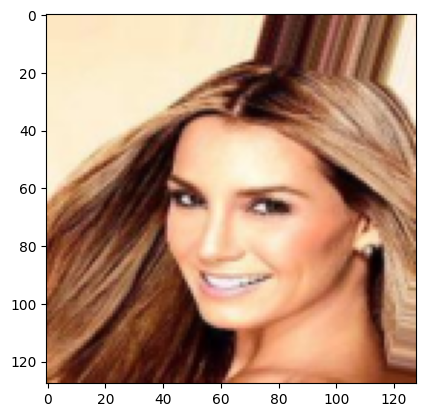

In [42]:
utils.plot_image(training_data[0][0])